In [10]:
# Notebook 2: Extra Analysis & Modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style="whitegrid")


# Replace 'processed_data.csv' with your actual file name from Notebook 1
merged_df = pd.read_csv("processed_data.csv")
print("Data Loaded:", merged_df.shape)
merged_df.head()


Data Loaded: (211224, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value,Win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0,False


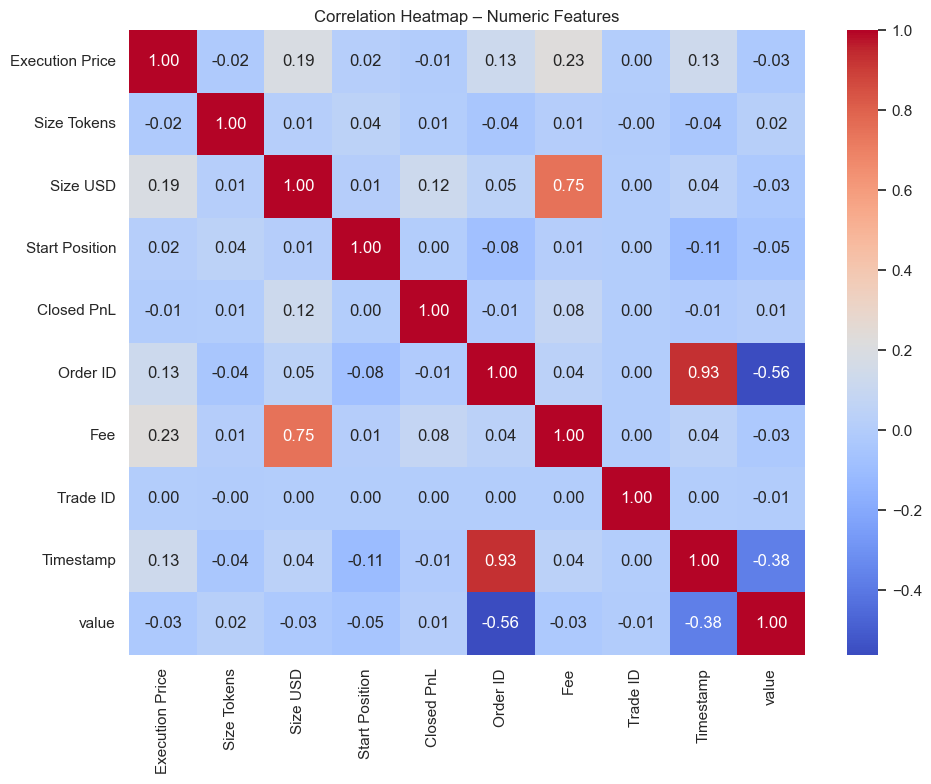


Correlation with Closed PnL:
 Closed PnL         1.000000
Size USD           0.123589
Fee                0.084020
value              0.008121
Size Tokens        0.005068
Start Position     0.004066
Trade ID           0.003466
Execution Price   -0.006505
Order ID          -0.007250
Timestamp         -0.009745
Name: Closed PnL, dtype: float64


In [11]:
# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap – Numeric Features")
plt.tight_layout()
plt.show()

# Highest correlation with Closed PnL
corr_target = numeric_cols.corr()['Closed PnL'].sort_values(ascending=False)
print("\nCorrelation with Closed PnL:\n", corr_target)


Correlation between Sentiment Value and Closed PnL: 0.0081


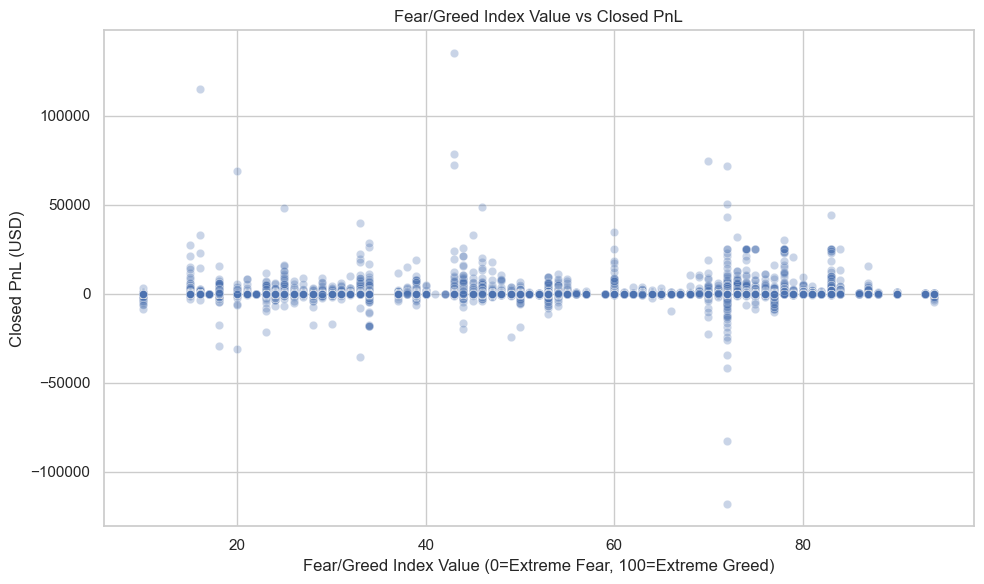

In [13]:
#  Correlation Analysis

# Correlation between sentiment value and Closed PnL
corr_value_pnl = merged_df[['value', 'Closed PnL']].corr().iloc[0,1]
print(f"Correlation between Sentiment Value and Closed PnL: {corr_value_pnl:.4f}")

# Scatter plot of sentiment value vs Closed PnL
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', alpha=0.3)
plt.title("Fear/Greed Index Value vs Closed PnL")
plt.xlabel("Fear/Greed Index Value (0=Extreme Fear, 100=Extreme Greed)")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.show()


In [15]:
# Step 3 – Simple Regression Model (Fixed for NaNs)

# Prepare features and target
features = ['value', 'Size USD', 'Size Tokens', 'Fee']
target = 'Closed PnL'

X = merged_df[features]
y = merged_df[target]


X = X.fillna(X.mean())
y = y.fillna(y.mean())  # Though Closed PnL shouldn't usually have NaNs


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nModel Coefficients:\n", coef_df)


R² Score: -0.009878809842367664
RMSE: 1220.314306597073

Model Coefficients:
        Feature  Coefficient
0        value     0.601262
1     Size USD     0.004237
2  Size Tokens     0.000027
3          Fee    -2.230214


C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\339076395.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Trader_Type', order=labels, palette='Set2')


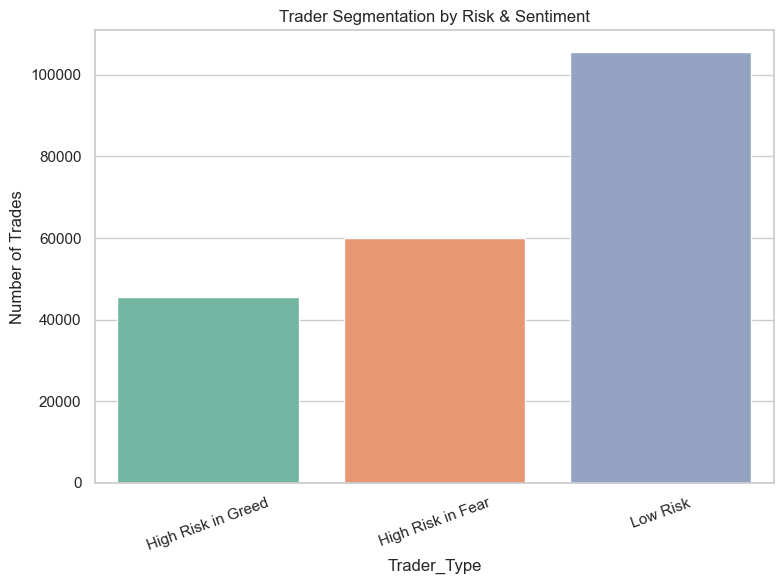

In [16]:
# Categorize traders based on trade size & sentiment
conditions = [
    (merged_df['Size USD'] > merged_df['Size USD'].median()) & (merged_df['value'] > 50),
    (merged_df['Size USD'] > merged_df['Size USD'].median()) & (merged_df['value'] <= 50),
    (merged_df['Size USD'] <= merged_df['Size USD'].median())
]
labels = ['High Risk in Greed', 'High Risk in Fear', 'Low Risk']

merged_df['Trader_Type'] = np.select(conditions, labels)

# Plot distribution
plt.figure(figsize=(8,6))
sns.countplot(data=merged_df, x='Trader_Type', order=labels, palette='Set2')
plt.title("Trader Segmentation by Risk & Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [18]:
# Save segmented trader data
merged_df.to_csv("trader_segmentation.csv", index=False)
print("✅ Trader segmentation saved as trader_segmentation.csv")




✅ Trader segmentation saved as trader_segmentation.csv
